In [1]:
import numpy as np
import pandas as pd

# sklean preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system management
import os

#matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# read in the data
listings = pd.read_csv('listings_cleaned.csv')
# reviews = pd.read_csv(r'C:\Users\G\Documents\Airbnb_Data\Airbnb_raw\reviews.csv', engine='python')

In [6]:
#check the shape
print('Listings shape: ', listings.shape)
#print('reviews shape: ', reviews.shape)

Listings shape:  (11768, 43)


In [7]:
# increase max row and columns to have a better view later
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [8]:
listings.head(5)

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,6,3/3/2008,NaN,NaN,t,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,North Hills,92104.0,32.753993,-117.129705,House,Entire home/apt,6,2.0,3.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",295.0,0.0,85.0,4,5.0,2,30,0,0,0,15,148,96.0,10.0,9.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,1.18
1,5570,2/23/2009,NaN,NaN,f,3.0,"['email', 'phone', 'kba']",t,t,Mission Bay,92109.0,32.784304,-117.252578,Condominium,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",2050.0,500.0,150.0,1,0.0,3,365,30,60,84,328,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN
2,8095,4/15/2008,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Ocean Beach,92107.0,32.735170,-117.243793,Guesthouse,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",84.0,NaN,40.0,2,0.0,2,14,0,0,0,0,178,93.0,10.0,10.0,10.0,9.0,9.0,9.0,f,strict_14_with_grace_period,1.58
3,39516,7/17/2010,NaN,NaN,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,North Hills,92104.0,32.731884,-117.119180,Tiny house,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Pool,Kitchen,""Pets live on this...",69.0,NaN,25.0,1,0.0,3,7,6,14,34,275,334,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,3.33
4,45429,8/10/2010,NaN,NaN,f,1.0,"['email', 'phone', 'reviews']",t,f,Loma Portal,92107.0,32.748768,-117.229371,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",160.0,NaN,35.0,2,0.0,2,5,28,58,88,363,6,85.0,9.0,9.0,10.0,10.0,9.0,9.0,f,moderate,0.06


In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 43 columns):
id                             11768 non-null int64
host_since                     11764 non-null object
host_response_time             7203 non-null object
host_response_rate             7194 non-null object
host_is_superhost              11764 non-null object
host_total_listings_count      11764 non-null float64
host_verifications             11768 non-null object
host_has_profile_pic           11764 non-null object
host_identity_verified         11764 non-null object
neighbourhood_cleansed         11768 non-null object
zipcode                        11604 non-null float64
latitude                       11768 non-null float64
longitude                      11768 non-null float64
property_type                  11768 non-null object
room_type                      11768 non-null object
accommodates                   11768 non-null int64
bathrooms                      11763 non-nu

In [10]:
# Examine Missing Values. We talke a look at the number and percentage of missing values in each column
def missing_values_table(df):

    mis_val = df.isnull().sum() # Total missing values
    
    mis_val_percent = 100 * df.isnull().sum()/len(df) # Percentage of missing values
    
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1) # Make a table with the results
    
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}) # Rename the columns
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending = False).round(1)     # Sort the table by percentage
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")      # Print the summary of information
    
    return mis_val_table_ren_columns

In [11]:
# check the % of missing value of listings
missing_values_table(listings)

Your selected dataframe has 43 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
host_response_rate,4574,38.9
host_response_time,4565,38.8
security_deposit,2937,25.0
review_scores_value,2256,19.2
review_scores_location,2254,19.2
review_scores_checkin,2251,19.1
review_scores_communication,2242,19.1
review_scores_accuracy,2240,19.0
review_scores_cleanliness,2237,19.0
review_scores_rating,2234,19.0


In [12]:
# create host tenure to replace host since
# After checking the statistic summary I think it makes more sense if we transfer them into categorical with 3 levels
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['host_tenure'] = (pd.to_datetime('today') - listings['host_since'])/ np.timedelta64(1, 'Y')

In [13]:
# bin them into 3 levels. 
listings['host_tenure'] = pd.cut(listings['host_tenure'], bins =[0,2,5,float('Inf')], 
                                 labels = ['less than 2 years','2 to 5 years',
                                           'more than 5 years'])

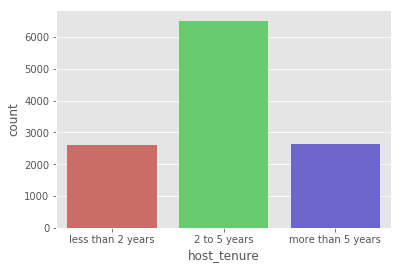

In [14]:
# check the distribution
sns.countplot(x = 'host_tenure', data = listings, palette = 'hls')
plt.show()

In [15]:
# transfer host_response_rate string type into float
# bin them into 3 levels
# check the distribution
listings['host_response_rate'] = listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0
listings['host_response_rate'] = pd.cut(listings['host_response_rate'], bins =[0,0.9,0.99,float('Inf')], 
                                 labels = ['sometimes','most of the time',
                                           'all the time'])

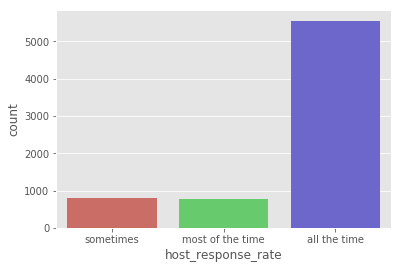

In [16]:
# check the distribution
sns.countplot(x = 'host_response_rate', data = listings, palette = 'hls')
plt.show()

In [17]:
print(listings.host_response_time.value_counts(dropna=False)/len(listings))
print(listings.host_response_rate.value_counts(dropna=False))
print(listings['review_scores_communication'].describe())

within an hour        0.447910
NaN                   0.387916
within a few hours    0.104436
within a day          0.051326
a few days or more    0.008413
Name: host_response_time, dtype: float64
all the time        5556
NaN                 4632
sometimes            804
most of the time     776
Name: host_response_rate, dtype: int64
count    9526.000000
mean        9.818287
std         0.605699
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: review_scores_communication, dtype: float64


In [18]:
# listings[listings['review_scores_communication'] == 10.0]
# for these response_time and response_rate are NAN
# If review_scores_communication is 10, then replace NAN with "within an hour" and "all the time"
# If review_scores_communication is 9.5-10, then replace NAN with "within a few hours", "most of the time"
# If review_scores_communication is below 9.5, then.....

def fillhostresponse(df, targetcols, condcol, dic):
    for key, val in dic.items():
        ind = list(dic.keys()).index(key)
        if ind == 0:
            mask = (df[targetcols[0]].isnull()) & (df[targetcols[1]].isnull()) & (df[condcol] == key)
        elif np.isnan(key):
            mask = (df[targetcols[0]].isnull()) & (df[targetcols[1]].isnull()) & (df[condcol].isnull())
        else:
            mask = (df[targetcols[0]].isnull()) & (df[targetcols[1]].isnull()) & (df[condcol] < list(dic.keys())[ind-1]) \
                    & (df[condcol] >= key)
        df.loc[mask, targetcols[0]] = val[0]
        df.loc[mask, targetcols[1]] = val[1]

filldic =  {10: ['within an hour', 'all the time'], 9.5: ['within a few hours', 'most of the time'], \
                  0: ['within a day', 'sometimes'], np.nan: ['None', np.nan]}   

listings.loc[(listings['host_response_time'].isnull()) & (listings['host_response_rate'].isnull())] \
= fillhostresponse(listings, ['host_response_time', 'host_response_rate'], 'review_scores_communication', filldic)

listings.head(10)

# mask_10 = (listings['host_response_time'].isnull()) & (listings['host_response_rate'].isnull()) \
#              & (listings['review_scores_communication'] == 10)

# listings.loc[mask_10, 'host_response_time'] = "haha"
# listings.loc[mask_10, 'host_response_rate'] = "good"

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,host_tenure
0,6.0,2008-03-03,within an hour,all the time,t,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,North Hills,92104.0,32.753993,-117.129705,House,Entire home/apt,6.0,2.0,3.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",295.0,0.0,85.0,4.0,5.0,2.0,30.0,0.0,0.0,0.0,15.0,148.0,96.0,10.0,9.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,1.18,more than 5 years
1,5570.0,2009-02-23,None,NaN,f,3.0,"['email', 'phone', 'kba']",t,t,Mission Bay,92109.0,32.784304,-117.252578,Condominium,Entire home/apt,6.0,1.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",2050.0,500.0,150.0,1.0,0.0,3.0,365.0,30.0,60.0,84.0,328.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN,more than 5 years
2,8095.0,2008-04-15,within a day,sometimes,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Ocean Beach,92107.0,32.735170,-117.243793,Guesthouse,Entire home/apt,2.0,1.0,0.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",84.0,NaN,40.0,2.0,0.0,2.0,14.0,0.0,0.0,0.0,0.0,178.0,93.0,10.0,10.0,10.0,9.0,9.0,9.0,f,strict_14_with_grace_period,1.58,more than 5 years
3,39516.0,2010-07-17,within an hour,all the time,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,North Hills,92104.0,32.731884,-117.119180,Tiny house,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Pool,Kitchen,""Pets live on this...",69.0,NaN,25.0,1.0,0.0,3.0,7.0,6.0,14.0,34.0,275.0,334.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,3.33,more than 5 years
4,45429.0,2010-08-10,within an hour,all the time,f,1.0,"['email', 'phone', 'reviews']",t,f,Loma Portal,92107.0,32.748768,-117.229371,House,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",160.0,NaN,35.0,2.0,0.0,2.0,5.0,28.0,58.0,88.0,363.0,6.0,85.0,9.0,9.0,10.0,10.0,9.0,9.0,f,moderate,0.06,more than 5 years
5,54001.0,2010-10-04,within an hour,all the time,t,4.0,"['email', 'phone', 'reviews', 'kba']",t,t,La Jolla,92037.0,32.811896,-117.269516,House,Private room,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Breakfast,""Free st...",105.0,NaN,NaN,1.0,0.0,2.0,365.0,0.0,0.0,18.0,293.0,172.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,1.82,more than 5 years
6,62274.0,2010-11-28,within an hour,all the time,f,2.0,"['email', 'phone', 'reviews', 'kba']",t,t,Pacific Beach,92109.0,32.807337,-117.242432,Guesthouse,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",""Free parking on prem...",68.0,100.0,25.0,1.0,10.0,2.0,30.0,5.0,14.0,23.0,251.0,454.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,4.75,more than 5 years
7,62949.0,2009-06-14,within an hour,all the time,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,Pacific Beach,92109.0,32.809612,-117.230563,Guest suite,Entire home/apt,2.0,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""Pets a...",75.0,100.0,20.0,1.0,0.0,1.0,10.0,7.0,29.0,43.0,121.0,487.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,moderate,6.52,more than 5 years
8,67441.0,2011-01-02,within a few hours,all the time,t,5.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,College Area,92115.0,32.763648,-117.076749,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air condi

In [19]:
# split string and count the number of words
listings['host_verifications_cnt'] = listings['host_verifications'].str.split(',').str.len()
listings['amentities_cnt'] = listings['amenities'].str.split(',').str.len()

In [18]:
# replace nan in security_deposit and cleaning_fee with 0
#listings.fillna({'security_deposit':'0','cleaning_fee':'0'}, inplace = True)

In [20]:
# delete the records which all scores values are nan
listings = listings[pd.notnull(listings['review_scores_rating'])]

In [21]:
# Now the percentage of missing value in each field is no more than 1%
missing_values_table(listings)

Your selected dataframe has 46 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
security_deposit,1978,20.7
cleaning_fee,934,9.8
zipcode,99,1.0
host_response_rate,43,0.5
review_scores_value,22,0.2
review_scores_location,20,0.2
review_scores_checkin,17,0.2
review_scores_communication,8,0.1
review_scores_accuracy,6,0.1
bedrooms,4,0.0


In [21]:
# listings['availability_30'] = (listings['availability_30'])/30
# listings['availability_60'] = (listings['availability_60'])/60

def replace_availability(df, collst, daylst):
    for col, day in zip(collst, daylst):
        df[col] = (df[col] / day).round(2)

cols = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
days = [30, 60, 90, 365]

replace_availability(listings, cols, days)

In [22]:
listings.property_type[~listings.property_type.isin(['Apartment', 'House', 'Condominium', 'Guesthouse','Townhouse'])] = 'Other'
listings.bed_type[listings.bed_type != 'Real Bed'] = 'Other'

In [23]:
print(listings.property_type.value_counts().nlargest(8))
print(listings.bed_type.value_counts().nlargest(5))

House          3367
Apartment      2628
Other          1408
Condominium    1211
Townhouse       552
Guesthouse      368
Name: property_type, dtype: int64
Real Bed    9428
Other        106
Name: bed_type, dtype: int64


In [24]:
listings.head(10)

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,host_tenure,host_verifications_cnt,amentities_cnt
0,6.0,2008-03-03,within an hour,all the time,t,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,North Hills,92104.0,32.753993,-117.129705,House,Entire home/apt,6.0,2.0,3.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",295.0,0,85,4.0,5.0,2.0,30.0,0.00,0.00,0.00,0.04,148.0,96.0,10.0,9.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,1.18,more than 5 years,9,35
2,8095.0,2008-04-15,within a day,sometimes,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Ocean Beach,92107.0,32.735170,-117.243793,Guesthouse,Entire home/apt,2.0,1.0,0.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",84.0,0,40,2.0,0.0,2.0,14.0,0.00,0.00,0.00,0.00,178.0,93.0,10.0,10.0,10.0,9.0,9.0,9.0,f,strict_14_with_grace_period,1.58,more than 5 years,6,6
3,39516.0,2010-07-17,within an hour,all the time,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,North Hills,92104.0,32.731884,-117.119180,Other,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Pool,Kitchen,""Pets live on this...",69.0,0,25,1.0,0.0,3.0,7.0,0.20,0.23,0.38,0.75,334.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,3.33,more than 5 years,7,32
4,45429.0,2010-08-10,within an hour,all the time,f,1.0,"['email', 'phone', 'reviews']",t,f,Loma Portal,92107.0,32.748768,-117.229371,House,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",160.0,0,35,2.0,0.0,2.0,5.0,0.93,0.97,0.98,0.99,6.0,85.0,9.0,9.0,10.0,10.0,9.0,9.0,f,moderate,0.06,more than 5 years,3,6
5,54001.0,2010-10-04,within an hour,all the time,t,4.0,"['email', 'phone', 'reviews', 'kba']",t,t,La Jolla,92037.0,32.811896,-117.269516,House,Private room,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Breakfast,""Free st...",105.0,0,0,1.0,0.0,2.0,365.0,0.00,0.00,0.20,0.80,172.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,1.82,more than 5 years,4,38
6,62274.0,2010-11-28,within an hour,all the time,f,2.0,"['email', 'phone', 'reviews', 'kba']",t,t,Pacific Beach,92109.0,32.807337,-117.242432,Guesthouse,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",""Free parking on prem...",68.0,100,25,1.0,10.0,2.0,30.0,0.17,0.23,0.26,0.69,454.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,4.75,more than 5 years,4,27
7,62949.0,2009-06-14,within an hour,all the time,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,Pacific Beach,92109.0,32.809612,-117.230563,Other,Entire home/apt,2.0,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""Pets a...",75.0,100,20,1.0,0.0,1.0,10.0,0.23,0.48,0.48,0.33,487.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,moderate,6.52,more than 5 years,8,28
8,67441.0,2011-01-02,within a few hours,all the time,t,5.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,College Area,92115.0,32.763648,-117.076749,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",90.0,150,30,2.0,25.0,3.0,730.0,0.00,0.00,0.00,0.68,3.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,0.07,more than 5 years,5,18
9,69385.0,2011-01-14,within an hour,all the time,t,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Mission Bay,92109.0,32.786464,-117.254338,House,Entire home/apt,6.0,

In [25]:
print("listings table new shape:", listings.shape)

listings table new shape: (9534, 46)


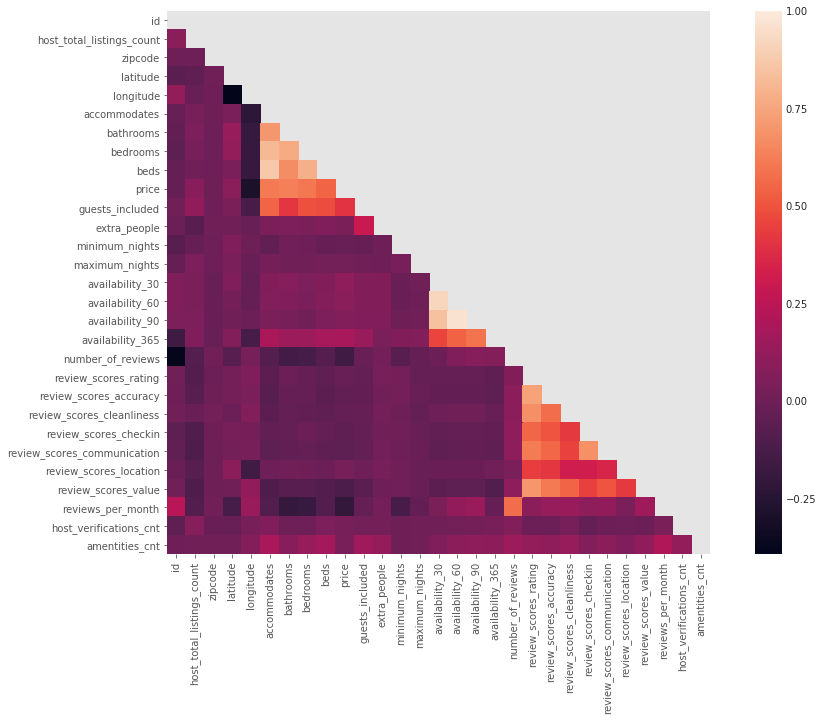

In [193]:
# Now want to check the correlation Matrix
from string import ascii_letters
fig, ax = plt.subplots(figsize=(16,10))

# Calculate correlation between each pair of variable
corr=listings.corr()

#sns.set(style="white")
# plot it
#sns.heatmap(corr_matrix, cmap='PuOr')
#sns.plt.show()
# Note that in this case, both correlation appear 2 times so you probably want to plot an half heatmap as follow:

np.random.seed(110)
 
# Can be great to plot only a half matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     p = sns.heatmap(corr, mask=mask, square=True, ax = ax)
    


In [195]:
# check which features are highly correlated with review_scores_rating
corr['price'].sort_values(ascending = False)

price                          1.000000
bathrooms                      0.629563
accommodates                   0.609316
bedrooms                       0.604913
beds                           0.546197
guests_included                0.404232
availability_365               0.184599
availability_30                0.108441
availability_60                0.089649
latitude                       0.086492
host_total_listings_count      0.080337
availability_90                0.067226
extra_people                   0.047283
amentities_cnt                 0.032798
review_scores_location         0.031307
host_verifications_cnt         0.029239
maximum_nights                 0.015368
zipcode                       -0.003637
review_scores_rating          -0.017630
minimum_nights                -0.020817
id                            -0.027410
review_scores_cleanliness     -0.030124
review_scores_accuracy        -0.043596
review_scores_checkin         -0.049538
review_scores_communication   -0.054537


IndexError: list index out of range

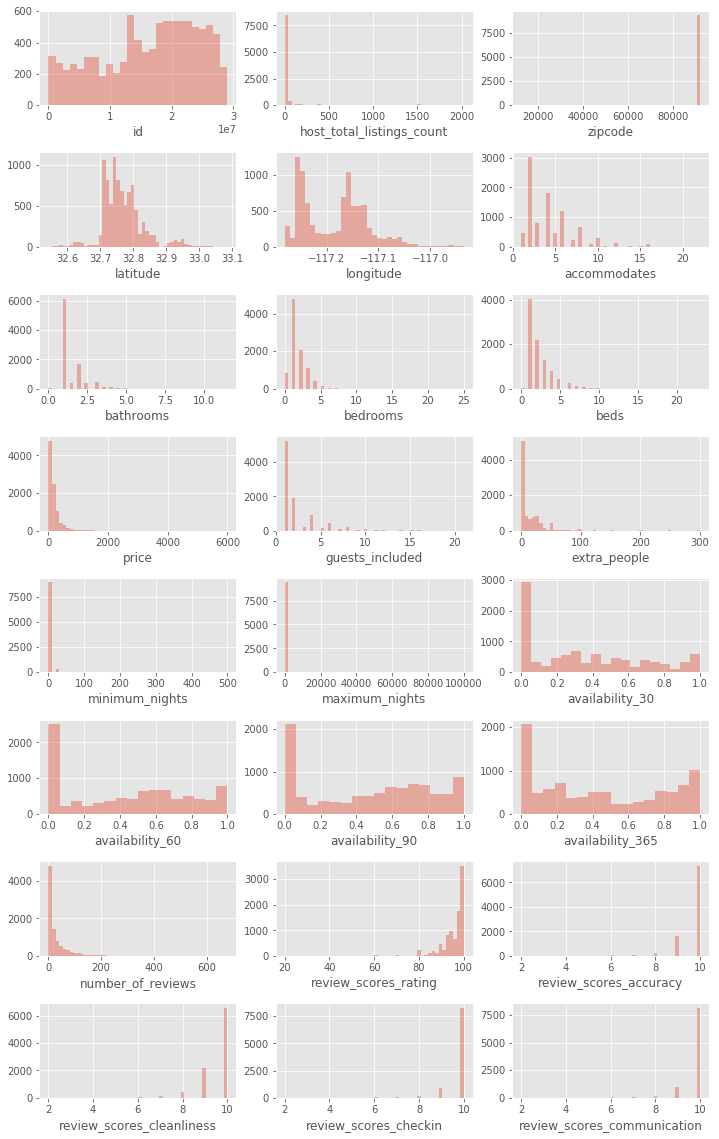

In [196]:
#Let's look at some distributions
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = listings.select_dtypes(include=numerics)
numdf = numdf.dropna(axis=0, how='any')
numdf_variables = list(numdf)

#Set the number of graphs in the facet chart
graphs = len(numdf_variables)-1

#create a list of positions for the chart
position = []
for i in range(8):
    for j in range(3):
        b = i,j
        position.append(b)

#Create base of subplot chart.. rows x columbs = graphs
fig, axes = plt.subplots(nrows=8, ncols=3, sharey=False, sharex=False, figsize=(12,20))
fig.subplots_adjust(hspace=.5)

#Fill in base with graphs based off of position
for i in range(graphs):
    sns.distplot(numdf[numdf_variables[i]], ax=axes[position[i]], kde=False)


In [197]:
# reviews.loc[reviews['listing_id'] == 109]
reviews.sort_values(by = ['listing_id'])

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin & Christi,The host canceled my reservation the day befor...
3,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
52,344,315417394,2018-08-28,208896709,Lauren,My family had a wonderful stay at Melissaâ€™s ...
4,344,79805581,2016-06-14,2089550,Drew & Katie,We really enjoyed our stay here in Burbank! Th...
51,344,123800867,2016-12-30,35822259,May,The host canceled this reservation the day bef...
131,2708,319965969,2018-09-07,51146446,Stephanie,Charles's place is great! It is very clean and...
53,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
116,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...
117,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...
118,2708,61157407,2016-02-01,33226412,Haroon,Charles is a most wonderful host. I enjoyed my...


In [198]:
# check how many reviews for each listing
reviews.groupby(['listing_id'])['listing_id'].count()

listing_id
109           2
344           3
2708         13
2732         17
3021         22
5728        202
5729        120
5843         66
6033         22
6931         12
7143        176
7992        123
8021        215
8235        149
8770        367
9140        347
9376         36
9545        126
10760        44
11374        13
11511         8
11877        35
12320         2
13776       145
14098        16
14106        15
14107        30
14124       135
14273        47
14337         1
14945        16
15333         3
15440       664
15766         1
17860        59
18067        31
20585       397
20786        22
20965         7
22023        16
22214        16
22355        24
23363       138
23710       104
23925        49
23979        16
24028        34
24030       234
24041       279
24349        72
           ... 
28790315      1
28791785      1
28797564      1
28804689      1
28806540      2
28807095      1
28807323      1
28809238      1
28809510      1
28809574      2
28809716     

In [200]:
# find out that some reviews are not in English
# ! pip install langdetect
# from langdetect import detect

# detect(reviews['comments'])

TypeError: expected string or bytes-like object

In [218]:
import geojson
import json
with open(r'C:\Users\G\Documents\Airbnb_Data\Airbnb_raw\neighbourhoods.geojson') as json_file:
    json_data = json.load(json_file)

In [219]:
import geopandas as gpd
nbh = gpd.read_file(r'C:\Users\G\Documents\Airbnb_Data\Airbnb_raw\neighbourhoods.geojson')
nbh.head()

,neighbourhood,neighbourhood_group,geometry
0,Amphitheater And Water Park,None,"(POLYGON ((-117.014515 32.587899, -117.014488 ..."
1,Bella Lago,None,"(POLYGON ((-116.941279 32.684306, -116.941278 ..."
2,Bonita Long Canyon,None,"(POLYGON ((-117.011489 32.663525, -117.011489 ..."
3,East Lake,None,"(POLYGON ((-116.993021 32.660396, -116.98164 3..."
4,Eastlake Trails,None,"(POLYGON ((-116.955116 32.641243, -116.95507 3..."


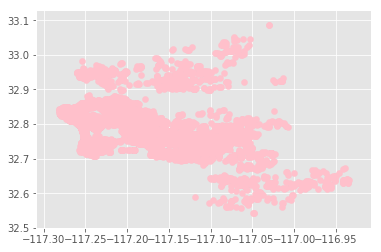

In [223]:
plt.scatter(x = listings.longitude,y = listings.latitude, c = 'pink')
plt.show()

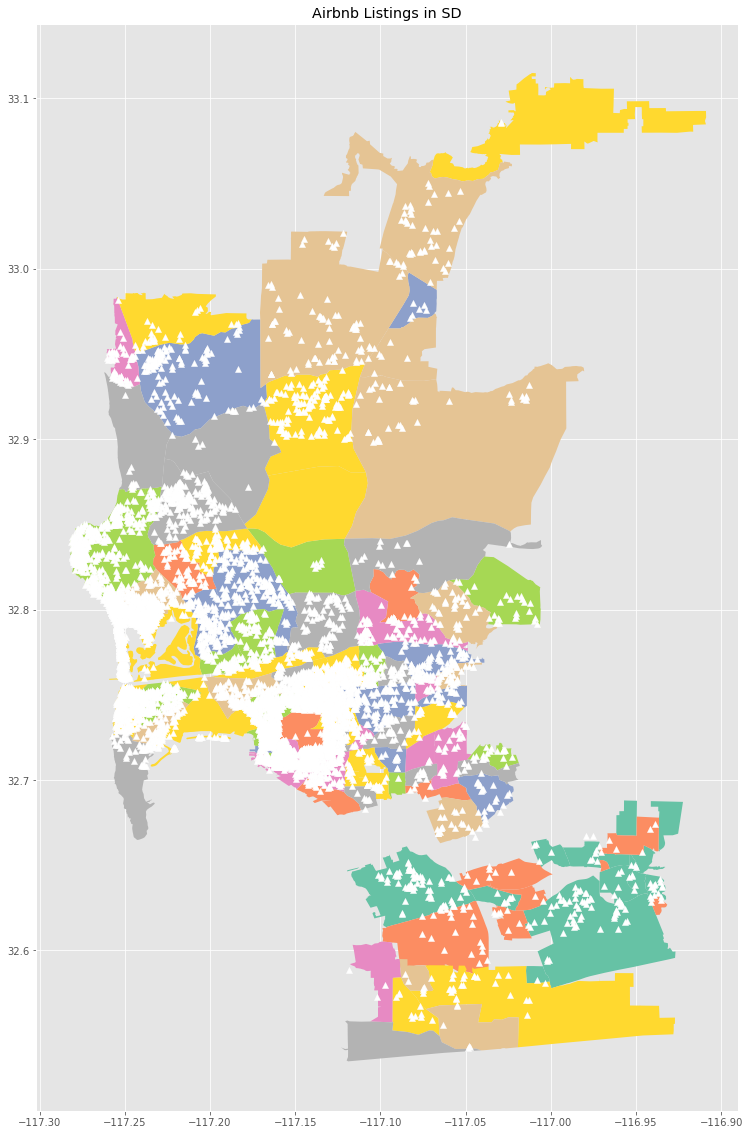

In [244]:
plt.rcParams['figure.figsize'] = [80, 20]
nbh.plot(legend = True, cmap = 'Set2')
c = listings.room_type
plt.scatter(x = listings.longitude,y = listings.latitude, marker = '^', c = 'white')
plt.title('Airbnb Listings in SD')
plt.show();

In [30]:
listings.to_csv(r'C:\Users\G\Documents\Airbnb_Data\Airbnb_raw\output.csv', sep=',')